In [310]:
import pandas as pd
import numpy as np
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 9)

In [311]:
X = pd.read_csv('train.csv')


Data_test = pd.read_csv("test.csv")
display(Data_test.shape)
display(X.shape)
saved_id = Data_test['Id']
display(X.head())
X.dtypes



(1459, 80)

(1460, 81)

,Id,MSSubClass,MSZoning,LotFrontage,...,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,...,2008,WD,Normal,208500
1,2,20,RL,80.0,...,2007,WD,Normal,181500
2,3,60,RL,68.0,...,2008,WD,Normal,223500
3,4,70,RL,60.0,...,2006,WD,Abnorml,140000
4,5,60,RL,84.0,...,2008,WD,Normal,250000


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [312]:
print(X.SalePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


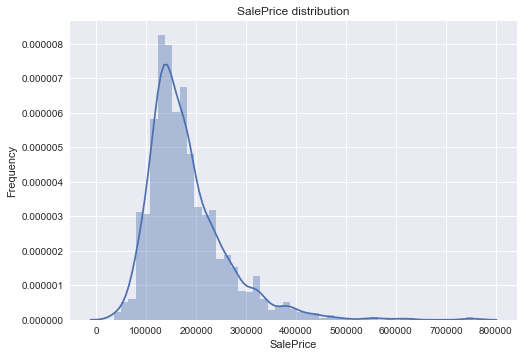

In [313]:
#PLotting SalePrice
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
sns.distplot(X['SalePrice']);

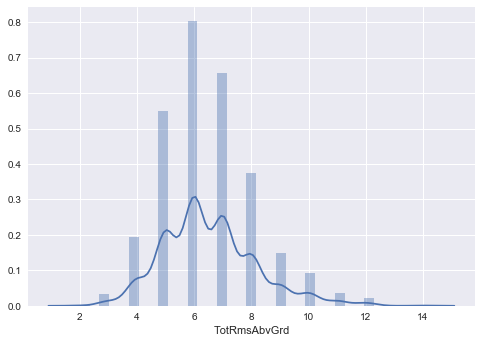

In [314]:
#Visulaize some of feature distributions
sns.distplot(X['TotRmsAbvGrd']);

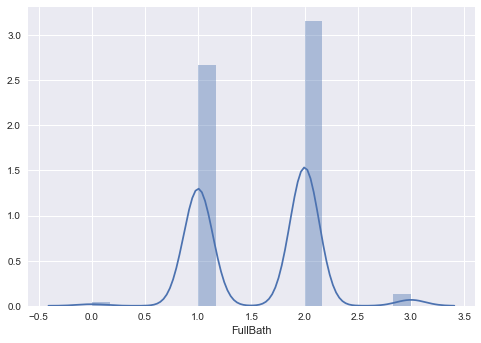

In [315]:
sns.distplot(X['FullBath']);

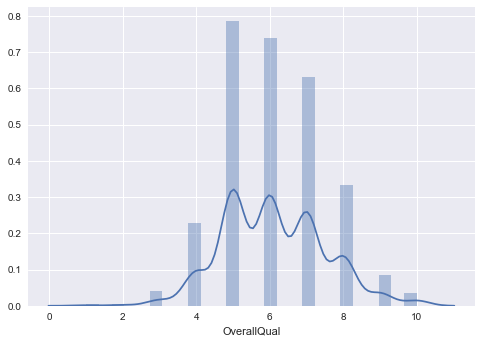

In [316]:
sns.distplot(X['OverallQual']);

In [317]:
#Filling Nans with zero value

X=X.fillna(0)

Data_test = Data_test.fillna(0)


In [318]:
#Removing Outliers
from scipy import stats, integrate
for feature in X.keys():
    print(feature)
    print(X.shape)
    if X[feature].dtype != object:
        X = X[(np.abs(stats.zscore(X[feature])) < 4)]
    print(X.shape)

Id
(1460, 81)
(1460, 81)
MSSubClass
(1460, 81)
(1460, 81)
MSZoning
(1460, 81)
(1460, 81)
LotFrontage
(1460, 81)
(1458, 81)
LotArea
(1458, 81)
(1448, 81)
Street
(1448, 81)
(1448, 81)
Alley
(1448, 81)
(1448, 81)
LotShape
(1448, 81)
(1448, 81)
LandContour
(1448, 81)
(1448, 81)
Utilities
(1448, 81)
(1448, 81)
LotConfig
(1448, 81)
(1448, 81)
LandSlope
(1448, 81)
(1448, 81)
Neighborhood
(1448, 81)
(1448, 81)
Condition1
(1448, 81)
(1448, 81)
Condition2
(1448, 81)
(1448, 81)
BldgType
(1448, 81)
(1448, 81)
HouseStyle
(1448, 81)
(1448, 81)
OverallQual
(1448, 81)
(1448, 81)
OverallCond
(1448, 81)
(1447, 81)
YearBuilt
(1447, 81)
(1447, 81)
YearRemodAdd
(1447, 81)
(1447, 81)
RoofStyle
(1447, 81)
(1447, 81)
RoofMatl
(1447, 81)
(1447, 81)
Exterior1st
(1447, 81)
(1447, 81)
Exterior2nd
(1447, 81)
(1447, 81)
MasVnrType
(1447, 81)
(1447, 81)
MasVnrArea
(1447, 81)
(1434, 81)
ExterQual
(1434, 81)
(1434, 81)
ExterCond
(1434, 81)
(1434, 81)
Foundation
(1434, 81)
(1434, 81)
BsmtQual
(1434, 81)
(1434, 81)
Bsmt

In [319]:
#print the shape of both Train and Test Dataset
print(X.shape)
print(Data_test.shape)

#Combining datasets to get categorical values then splitting them back
#calcuate the number of objects (features) in Train Data
train_objs_num = len(X)

#Join both the Train and Test Data together to create a combined dataset
combined_dataset = pd.concat(objs=[X, Data_test], axis=0)

#Get dummies for the combined dataset
dataset_preprocessed = pd.get_dummies(combined_dataset)

#Split the two datasets again using the train_obs_num value previously stored
X = dataset_preprocessed[:train_objs_num]
Data_test = dataset_preprocessed[train_objs_num:]

#print the shape of both Train and Test Dataset
print(X.shape)
print(Data_test.shape)



(1178, 81)
(1459, 80)
(1178, 303)
(1459, 303)


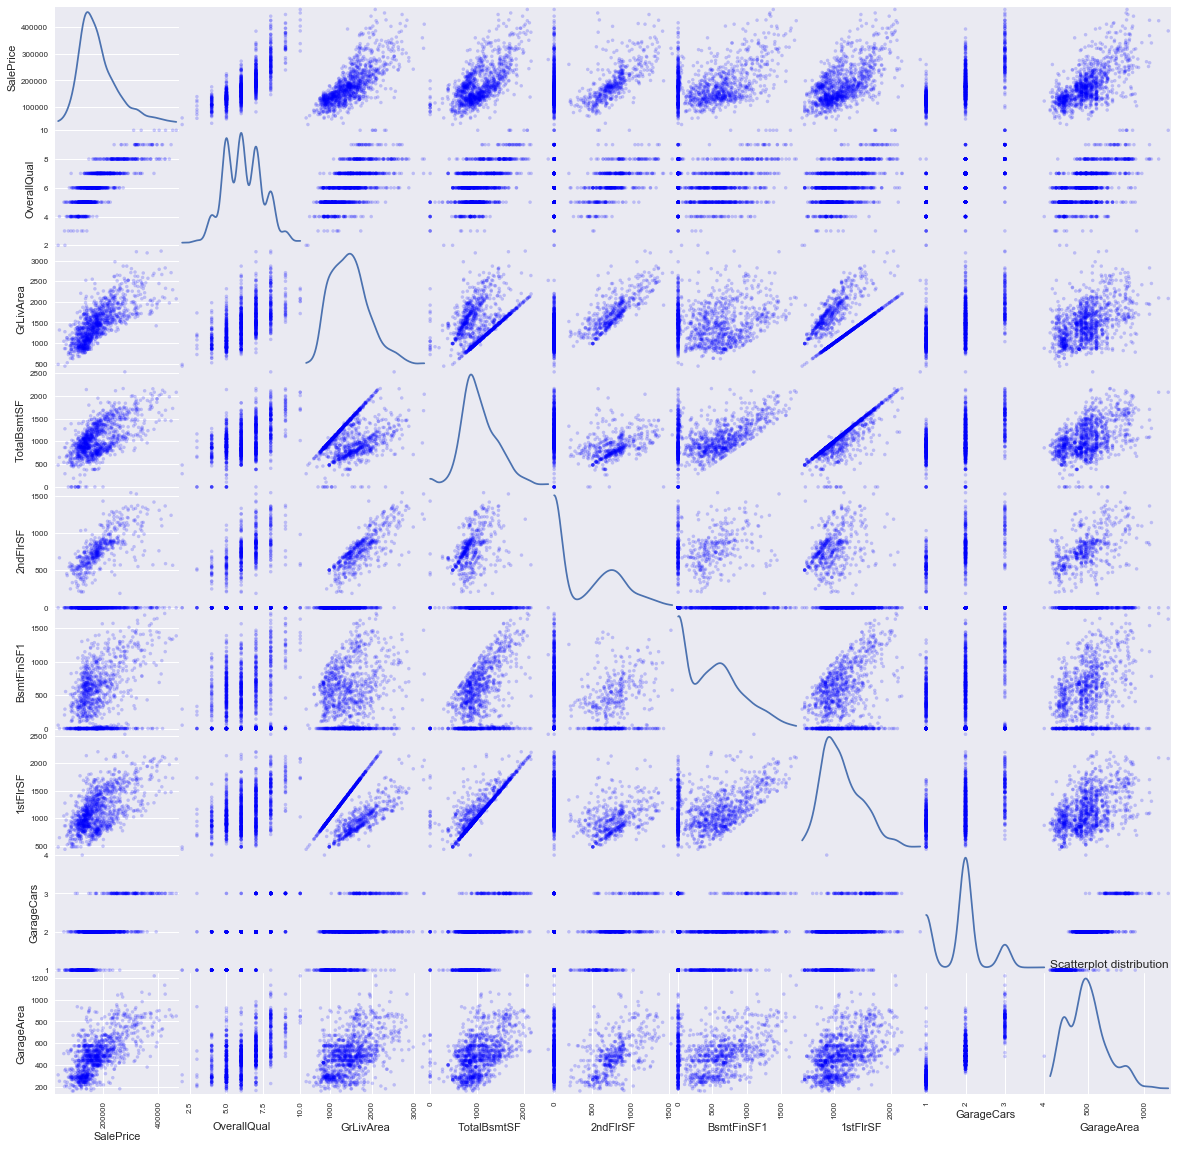

In [320]:
df_scatter = X[["SalePrice", "OverallQual",
      "GrLivArea",
      "TotalBsmtSF",
      "2ndFlrSF",
      "BsmtFinSF1",
      "1stFlrSF",
      "GarageCars",
      "GarageArea"]]

scatter_matrix(df_scatter, alpha=0.2, figsize=(20, 20), diagonal='kde', color='blue')
plt.title('Scatterplot distribution')
plt.show()

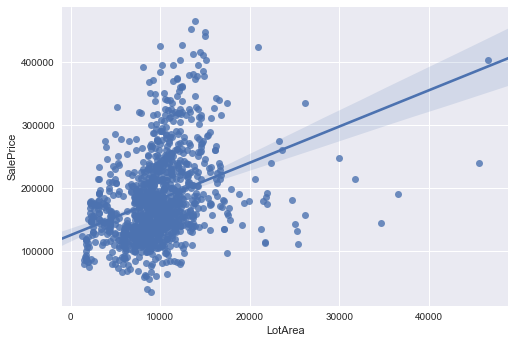

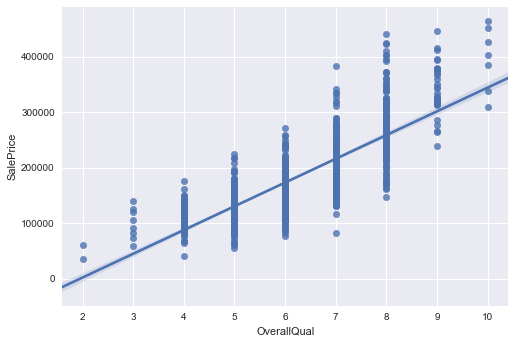

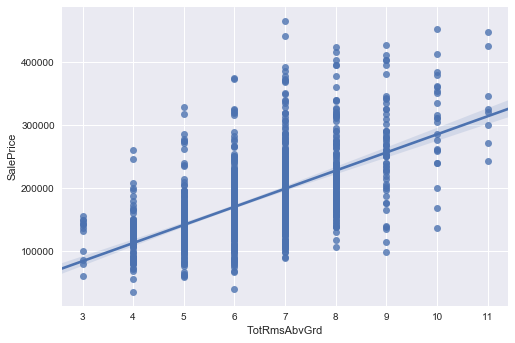

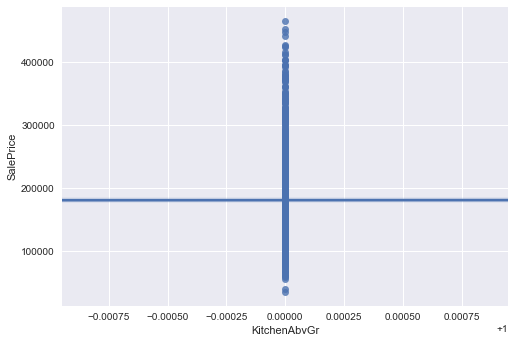

In [321]:
#Relationship between some features and SalePrice

for var in ['LotArea', 'OverallQual', 'TotRmsAbvGrd', 'KitchenAbvGr']:
    sns.regplot(X[var], X['SalePrice'])
    plt.show()

In [322]:
#Find unique values of features
display(X.KitchenAbvGr.unique())
display(X.PoolArea.unique())
display(X.Condition2_PosA.unique())
display(X.ExterCond_Po.unique())
display(X.Exterior1st_0.unique())
display(X.Exterior2nd_0.unique())
#display(X['Exterior2nd_Brk Cmn'].unique())
display(X.Functional_0.unique())
display(X.Functional_Sev.unique())
display(X.GarageCond_0.unique())
display(X.GarageFinish_0.unique())
display(X.GarageQual_0.unique())
display(X.GarageType_0.unique())
display(X.GarageType_2Types.unique())
display(X.KitchenQual_0.unique())
display(X.MSZoning_0.unique())
display(X.MiscFeature_Gar2.unique())
display(X.MiscFeature_Othr.unique())
display(X.PoolQC_0.unique())
display(X.PoolQC_Ex.unique())
display(X.PoolQC_Gd.unique())
display(X['SaleType_0'].unique())
display(X.Utilities_0.unique())

array([1])

array([0])

array([0], dtype=uint64)

array([0], dtype=uint64)

array([0], dtype=uint64)

array([0], dtype=uint64)

array([0], dtype=uint64)

array([0], dtype=uint64)

array([0], dtype=uint64)

array([0], dtype=uint64)

array([0], dtype=uint64)

array([0], dtype=uint64)

array([0], dtype=uint64)

array([0], dtype=uint64)

array([0], dtype=uint64)

array([0], dtype=uint64)

array([0], dtype=uint64)

array([1], dtype=uint64)

array([0], dtype=uint64)

array([0], dtype=uint64)

array([0], dtype=uint64)

array([0], dtype=uint64)

In [323]:
#Drop features with just one value/ no information

X = X.drop(["KitchenAbvGr","PoolArea","Condition2_PosA", "ExterCond_Po", "Exterior1st_0", 
            "Exterior2nd_0", "Functional_0", "Functional_Sev", "GarageCond_0", "GarageFinish_0",
           "GarageQual_0","GarageType_0", "GarageType_2Types", "KitchenQual_0",
           "MSZoning_0", "MiscFeature_Gar2", "MiscFeature_Othr",
           "PoolQC_0", "PoolQC_Ex", "PoolQC_Gd", "SaleType_0", "Utilities_0"], axis=1)

print(X.shape)

(1178, 281)


In [324]:
Data_test = Data_test.drop(["KitchenAbvGr","PoolArea","Condition2_PosA", "ExterCond_Po", "Exterior1st_0", 
            "Exterior2nd_0", "Functional_0", "Functional_Sev", "GarageCond_0", "GarageFinish_0",
           "GarageQual_0","GarageType_0", "GarageType_2Types", "KitchenQual_0",
           "MSZoning_0", "MiscFeature_Gar2", "MiscFeature_Othr",
           "PoolQC_0", "PoolQC_Ex", "PoolQC_Gd", "SaleType_0", "Utilities_0"], axis=1)
print(Data_test.shape)

(1459, 281)


In [325]:
#Correlation SalePrice with features
corr_matrix = X.corr()
display(corr_matrix['SalePrice'].sort_values(ascending=False))

SalePrice                1.000000
OverallQual              0.808349
GrLivArea                0.751582
GarageCars               0.695571
GarageArea               0.669124
TotalBsmtSF              0.640912
1stFlrSF                 0.618424
FullBath                 0.596747
TotRmsAbvGrd             0.596193
YearBuilt                0.590412
Foundation_PConc         0.548230
YearRemodAdd             0.543443
GarageYrBlt              0.542859
BsmtQual_Ex              0.538249
ExterQual_Gd             0.524756
KitchenQual_Ex           0.482427
BsmtFinType1_GLQ         0.467832
HeatingQC_Ex             0.454975
MasVnrArea               0.449504
Fireplaces               0.429834
Neighborhood_NridgHt     0.423664
OpenPorchSF              0.407691
GarageFinish_Fin         0.404695
BsmtFinSF1               0.377308
ExterQual_Ex             0.376956
Exterior1st_VinylSd      0.373483
Exterior2nd_VinylSd      0.371399
SaleType_New             0.359831
KitchenQual_Gd           0.354577
SaleCondition_

In [326]:
#Splitting the label and features

y = X['SalePrice']
X = X.drop(['SalePrice'], axis=1)

#Dropping Sale Price from Data_test

Data_test = Data_test.drop(['SalePrice'], axis=1)

In [327]:
#copy current labels into a list

#columns_list = X.columns
#print(columns_list)

In [328]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import RobustScaler
scaler = StandardScaler()
#scaler = RobustScaler()
scaler = scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))

Data_test = pd.DataFrame(scaler.transform(Data_test))
#print(X.columns)

In [329]:
#X.columns = columns_list
#Data_test.columns = columns_list

In [330]:
#X.describe()
#X.dtypes




In [331]:
display(X.isnull().sum())

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [332]:
#Using RandomForestree model to reduce features according to importance

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_estimators=250,random_state=0)
model= model.fit(X,y)

In [333]:
# Build a forest and compute the feature importances

feature_names = list(X)

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [334]:
print(importances.dtype)
print(model.feature_importances_.dtype)
print(X.shape[1])
#print(X[27].head())
display(X.head())

float64
float64
280


,0,1,2,3,...,276,277,278,279
0,-0.812628,1.244290,-0.044489,0.256821,...,-0.029148,0.029148,0.029148,-0.029148
1,0.368468,-0.804233,-0.044489,0.256821,...,-0.029148,0.029148,0.029148,-0.029148
2,-0.626445,1.273074,-0.044489,0.256821,...,-0.029148,0.029148,0.029148,-0.029148
3,0.028103,1.721638,-0.044489,1.644594,...,-0.029148,0.029148,0.029148,-0.029148
4,1.625201,-0.804233,-0.044489,0.256821,...,-0.029148,0.029148,0.029148,-0.029148


In [335]:




# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    
    indexvalue = indices[f]
    #print(str(indexvalue) + ": " + str(importances[indexvalue]))
    print(str(f+1) + ": " + str(indexvalue) + " - " + str(feature_names[indexvalue]) + " - "+ str(importances[indexvalue]))



Feature ranking:
1: 27 - 27 - 0.529545811365
2: 15 - 15 - 0.0998439617286
3: 11 - 11 - 0.073133077872
4: 4 - 4 - 0.0371768034241
5: 30 - 30 - 0.0333756173273
6: 13 - 13 - 0.0333141192137
7: 0 - 0 - 0.0243322884028
8: 12 - 12 - 0.0223990219187
9: 32 - 32 - 0.0145827411094
10: 1 - 1 - 0.0110120942019
11: 18 - 18 - 0.010544594244
12: 68 - 68 - 0.00726129765755
13: 33 - 33 - 0.00650820454557
14: 26 - 26 - 0.00544879946257
15: 8 - 8 - 0.00541184432357
16: 25 - 25 - 0.00499330190874
17: 22 - 22 - 0.00436915347722
18: 19 - 19 - 0.00413222400671
19: 17 - 17 - 0.00409251532963
20: 14 - 14 - 0.00332826074849
21: 31 - 31 - 0.00285633574903
22: 70 - 70 - 0.00274874468547
23: 24 - 24 - 0.00241874876929
24: 72 - 72 - 0.00183515413338
25: 192 - 192 - 0.00181345872186
26: 6 - 6 - 0.00180962655706
27: 275 - 275 - 0.00174927691852
28: 100 - 100 - 0.00169670865979
29: 21 - 21 - 0.00153602126604
30: 29 - 29 - 0.0013615649476
31: 34 - 34 - 0.00133086164564
32: 172 - 172 - 0.00127748991974
33: 73 - 73 - 0.0

In [355]:
display(range(X.shape[1]))
display(importances[indices])

range(0, 280)

array([  5.29545811e-01,   9.98439617e-02,   7.31330779e-02,
         3.71768034e-02,   3.33756173e-02,   3.33141192e-02,
         2.43322884e-02,   2.23990219e-02,   1.45827411e-02,
         1.10120942e-02,   1.05445942e-02,   7.26129766e-03,
         6.50820455e-03,   5.44879946e-03,   5.41184432e-03,
         4.99330191e-03,   4.36915348e-03,   4.13222401e-03,
         4.09251533e-03,   3.32826075e-03,   2.85633575e-03,
         2.74874469e-03,   2.41874877e-03,   1.83515413e-03,
         1.81345872e-03,   1.80962656e-03,   1.74927692e-03,
         1.69670866e-03,   1.53602127e-03,   1.36156495e-03,
         1.33086165e-03,   1.27748992e-03,   1.22651477e-03,
         1.16806738e-03,   1.11745821e-03,   1.08186253e-03,
         1.07890571e-03,   1.07117779e-03,   9.36231139e-04,
         9.28437522e-04,   8.83696908e-04,   8.39990888e-04,
         7.63825222e-04,   7.63464005e-04,   7.58582274e-04,
         7.50154579e-04,   7.26601777e-04,   7.02823822e-04,
         6.63879514e-04,

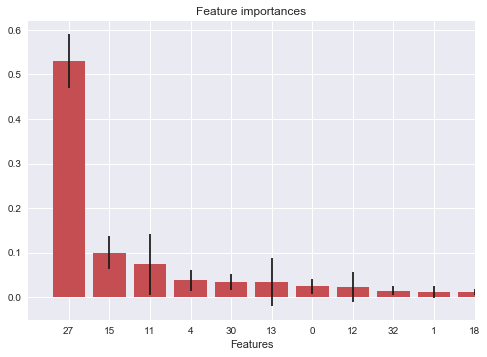

In [366]:
# Plot the feature importances of the forest

# Plot the feature importances of the forest

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, 10])
plt.xlabel("Features")
plt.show()

In [363]:
#Reduced Training Dataset

Data = X[[27,15,11,4,30,13,0,12,32,1,18,68,33,26,8,25,22,19,17,14,31,70,24,72,192,6,275,100,21,
         29,34,172,73,16,228,10,3,190,52,168,214,162,9,193,273,50,56,210,101,213,98,256,140,129,
         183,238,258,160,137,209,161,229,266,113,265,154,264,219,195,71,205,206,49,243,227,145,
         197,110,138,178,28,217,76,97,124,187,182,59,199,218,47,142,5,244,54,201,144,237,105,7,
          170,261,96,180,130,114,202,239,51,38,198,45,95,35,132,249,121,234,236,108,69,55,191,
         122,126,111,143,179,44,74]]



In [267]:
display(Data_test.dtypes)
display(Data_test.shape)
display(X.shape)

0      float64
1      float64
2      float64
3      float64
4      float64
5      float64
6      float64
7      float64
8      float64
9      float64
10     float64
11     float64
12     float64
13     float64
14     float64
15     float64
16     float64
17     float64
18     float64
19     float64
20     float64
21     float64
22     float64
23     float64
24     float64
25     float64
26     float64
27     float64
28     float64
29     float64
30     float64
31     float64
32     float64
33     float64
34     float64
35     float64
36     float64
37     float64
38     float64
39     float64
40     float64
41     float64
42     float64
43     float64
44     float64
45     float64
46     float64
47     float64
48     float64
49     float64
50     float64
51     float64
52     float64
53     float64
54     float64
55     float64
56     float64
57     float64
58     float64
59     float64
60     float64
61     float64
62     float64
63     float64
64     float64
65     float64
66     flo

(1459, 280)

(1178, 280)

In [268]:
Data_test = Data_test[[27,15,11,4,30,13,0,12,32,1,18,68,33,26,8,25,22,19,17,14,31,70,24,72,192,6,275,100,21,
         29,34,172,73,16,228,10,3,190,52,168,214,162,9,193,273,50,56,210,101,213,98,256,140,129,
         183,238,258,160,137,209,161,229,266,113,265,154,264,219,195,71,205,206,49,243,227,145,
         197,110,138,178,28,217,76,97,124,187,182,59,199,218,47,142,5,244,54,201,144,237,105,7,
          170,261,96,180,130,114,202,239,51,38,198,45,95,35,132,249,121,234,236,108,69,55,191,
         122,126,111,143,179,44,74]]

In [269]:
display(Data.head())

,27,15,11,4,30,13,0,12,32,1,18,68,33,26,8,25,22,19,17,14,31,70,24,72,192,6,275,100,21,29,34,172,73,16,228,10,3,190,52,168,214,162,9,193,273,50,56,210,101,213,98,256,140,129,183,238,258,160,137,209,161,229,266,113,265,154,264,219,195,71,205,206,49,243,227,145,197,110,138,178,28,217,76,97,124,187,182,59,199,218,47,142,5,244,54,201,144,237,105,7,170,261,96,180,130,114,202,239,51,38,198,45,95,35,132,249,121,234,236,108,69,55,191,122,126,111,143,179,44,74
0,0.632979,0.532935,0.849932,0.612474,-0.515112,0.255899,-0.812628,0.322771,0.992081,1.244290,-0.285683,-0.297867,0.827775,-0.547551,-0.968209,0.275114,0.647146,0.250597,-1.746563,0.962886,-0.810210,1.092551,-1.617712,-0.203853,1.134627,1.166605,0.386353,1.304544,0.145992,1.144548,0.141955,-0.614636,0.203853,1.229632,-0.182574,-0.986787,0.256821,-0.260761,0.710261,0.738872,-0.395013,-0.86474,-0.351963,-0.960050,-0.309538,-0.294476,1.516483,-0.07155,-1.223014,0.499204,-0.167102,0.509797,-0.598923,1.274209,-0.327327,-0.245573,-0.485898,-0.584539,1.085103,0.760979,1.466197,-0.253253,-0.314453,1.253815,0.446758,0.25135,-0.121006,-0.322537,-0.185042,-0.861744,0.615947,-0.710261,-0.435774,-0.271731,2.701069,1.034552,0.297867,-0.421900,-0.128037,0.932653,-0.26461,1.463330,0.367253,0.352201,-0.417704,1.474857,-0.617259,-0.644876,-0.201584,-1.154415,0.31282,-0.537439,-0.283999,-0.128037,-0.433013,-0.459008,-0.845400,-0.167102,-0.177549,-0.245573,-0.2589,-0.249436,-0.327327,-0.439904,-0.374657,-0.374657,-0.262613,-0.253253,-0.296174,0.386353,0.212727,-0.223407,-0.113568,0.24751,0.49123,0.253253,-0.194642,-0.426081,-0.237702,-0.439904,-0.150231,-0.333648,-0.141115,-0.419105,-0.296174,-0.262613,-0.311182,-0.164399,-0.164399,-0.167102
1,-0.138116,-0.466440,0.849932,1.258894,0.577009,0.255899,0.368468,-0.172210,0.044026,-0.804233,-0.011088,-0.297867,-0.497315,2.269108,-0.657228,-0.790952,-0.636649,0.705361,-1.744178,-0.137249,1.721586,1.092551,-0.503505,-0.203853,-0.881347,-0.839615,0.386353,-0.766551,-0.857532,-0.256260,-0.611300,-0.614636,0.203853,-0.796251,-0.182574,0.627706,0.256821,-0.260761,-1.407934,0.738872,-0.395013,-0.86474,-0.351963,1.041612,-0.309538,3.395867,-0.659421,-0.07155,0.817652,0.499204,-0.167102,0.509797,-0.598923,-0.784801,-0.327327,-0.245573,-0.485898,-0.584539,-0.921571,0.760979,1.466197,-0.253253,-0.314453,-0.797566,0.446758,0.25135,-0.121006,-0.322537,-0.185042,-0.861744,-1.623515,-0.710261,-0.435774,-0.271731,-0.370224,-0.966602,0.297867,2.370227,-0.128037,0.932653,-0.26461,-0.683373,-2.722919,0.352201,2.394040,-0.678032,-0.617259,-0.644876,-0.201584,0.866240,0.31282,1.860678,-0.283999,-0.128037,2.309401,-0.459008,1.182872,-0.167102,-0.177549,4.072111,-0.2589,-0.249436,-0.327327,-0.439904,-0.374657,-0.374657,-0.262613,-0.253253,-0.296174,0.386353,0.212727,-0.223407,-0.113568,0.24751,0.49123,0.253253,-0.194642,-0.426081,-0.237702,-0.439904,-0.150231,-0.333648,-0.141115,-0.419105,-0.296174,-0.262613,-0.311182,-0.164399,-0.164399,-0.167102
2,0.632979,0.702472,0.849932,0.089635,-0.342955,0.255899,-0.626445,0.660258,0.921854,1.273074,0.382895,-0.297867,0.778698,-0.547551,-0.309115,-0.056940,0.424447,0.341550,-1.741793,0.881395,-0.810210,1.092551,0.982104,-0.203853,1.134627,1.166605,0.386353,1.304544,0.145992,-0.256260,0.141955,-0.614636,0.203853,1.229632,-0.182574,0.627706,0.256821,-0.260761,-1.407934,0.738872,-0.395013,-0.86474,-0.351963,-0.960050,-0.309538,-0.294476,1.516483,-0.07155,-1.223014,0.499204,-0.167102,0.509797,-0.598923,1.274209,-0.327327,-0.245573,-0.485898,-0.584539,-0.921571,-1.314097,1.466197,-0.253253,-0.314453,1.253815,0.446758,0.25135,-0.121006,-0.322537,-0.185042,-0.861744,0.615947,1.407934,-0.435774,-0.271731,2.701069,1.034552,0.297867,-0.421900,-0.128037,0.932653,-0.26461,1.463330,0.367253,0.352201,-0.417704,1.474857,-0.617259,-0.644876,-0.201584,-1.154415,0.31282,1.860678,-0.283999,-0.128037,-0.433013,-0.459008,-0.845400,-0.167102,-0.177549,-0.245573,-0.2589,-0.249436,-0.327327,-0.439904,-0.374657,-0.374657,-0.262613,-0.253253,3.376389,0.386353,0.2

(1178, 280)
(1178,)
0      -0.812628
1       0.368468
2      -0.626445
3       0.028103
4       1.625201
5      -0.082443
6      -0.277353
7       0.135740
8      -0.649718
9       1.043380
10      0.342286
11     -0.818446
12     -0.382080
13     -0.062079
14      0.592469
15      0.065922
16     -0.079534
17      1.919021
18     -0.219171
19     -0.219171
20      1.351745
21     -0.684627
22      1.654292
23      1.351745
24     -1.790086
25     -1.414812
26      0.269559
27      0.287013
28      1.642656
29      1.238290
30     -0.009715
31     -0.111534
32      0.470287
33     -0.227898
34      0.548833
35      0.560469
36     -0.731173
37     -0.574081
38      0.042649
39      1.793929
40      1.113199
41      1.514655
42     -0.524626
43     -0.992992
44      0.653560
45     -0.443172
46     -0.800991
47     -1.033720
48      0.065922
49     -1.612631
50      0.682652
51     -0.678809
52     -0.227898
53      0.022285
54      3.117571
55      0.999744
56     -1.129720
57      0.4

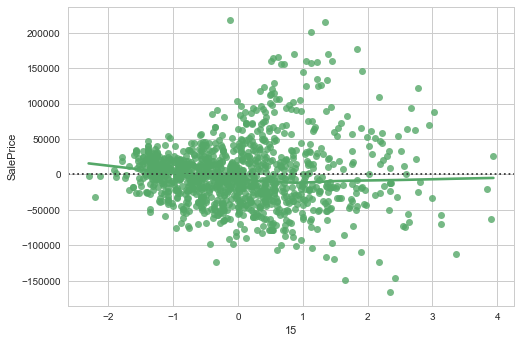

In [289]:
print(X.shape)
print(y.shape)
print(X[0])
sns.set(style="whitegrid")

# Make an example dataset with y ~ x
#rs = np.random.RandomState(7)
#x = rs.normal(2, 1, 75)
#y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(X[15], y, lowess=True, color="g")



In [231]:
from sklearn.model_selection import train_test_split
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(Data, y, test_size = 0.2, random_state=0)


In [232]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
model_gbr = GradientBoostingRegressor(n_estimators=250, loss = 'huber')
params = {'max_depth': [1,3,4,8],
         
         'alpha':[0.1,0.4,0.95],
         'learning_rate':[0.05,0.1,0.2],
         'min_samples_split':[10,50,75]}
clf = GridSearchCV(model_gbr, params, cv=4)

clf = clf.fit(X_train, y_train)

print(clf.best_estimator_)


GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=50, min_weight_fraction_leaf=0.0,
             n_estimators=250, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


In [234]:
#Evaluating our model on test set
import math
y_pred = clf.predict(X_test)



#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(h, y): 
    """
    Compute the Root Mean Squared Log Error for hypthesis h and targets y
    
    Args:
        h - numpy array containing predictions with shape (n_samples, n_targets)
        y - numpy array containing targets with shape (n_samples, n_targets)
    """
    return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())



print(rmsle(y_test, y_pred))
#print('Mean squared error: %.2f' % mean_squared_error(math.log(y_test), math.log(y_pred)))
#print('R2_score: %.2f' % r2_score(y_test, y_pred))



0.0994382655845


In [235]:
predictions =  clf.predict(Data_test)

In [236]:
print(saved_id)
print(predictions)
results = pd.DataFrame(saved_id, columns=['Id'])
results['SalePrice'] = pd.DataFrame(predictions)
results = results.loc[:,['Id', 'SalePrice']]

display(results.head())
#print(results.shape)

0       1461
1       1462
2       1463
3       1464
4       1465
5       1466
6       1467
7       1468
8       1469
9       1470
10      1471
11      1472
12      1473
13      1474
14      1475
15      1476
16      1477
17      1478
18      1479
19      1480
20      1481
21      1482
22      1483
23      1484
24      1485
25      1486
26      1487
27      1488
28      1489
29      1490
30      1491
31      1492
32      1493
33      1494
34      1495
35      1496
36      1497
37      1498
38      1499
39      1500
40      1501
41      1502
42      1503
43      1504
44      1505
45      1506
46      1507
47      1508
48      1509
49      1510
50      1511
51      1512
52      1513
53      1514
54      1515
55      1516
56      1517
57      1518
58      1519
59      1520
60      1521
61      1522
62      1523
63      1524
64      1525
65      1526
66      1527
67      1528
68      1529
69      1530
70      1531
71      1532
72      1533
73      1534
74      1535
75      1536
76      1537

,Id,SalePrice
0,1461,126429.919503
1,1462,161285.802958
2,1463,185343.586779
3,1464,191753.707815
4,1465,184840.228131


In [237]:
results.to_csv("capstone5.csv", index = False)